In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create DB and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert data
data = [
    ('Laptop', 5, 70000),
    ('Mouse', 20, 500),
    ('Keyboard', 10, 1200),
    ('Monitor', 7, 15000),
    ('Headphones', 15, 3000)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()


In [3]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)


      product  total_qty   revenue
0  Headphones         15   45000.0
1    Keyboard         10   12000.0
2      Laptop          5  350000.0
3     Monitor          7  105000.0
4       Mouse         20   10000.0


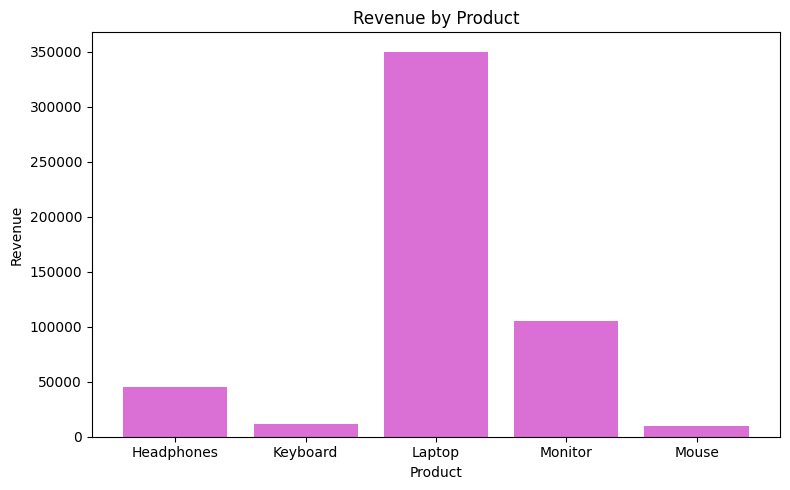

In [4]:
# Plot bar chart for revenue
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='orchid')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>